# Objective:

We are given three types of flowers: setosa, versinka, versicolor, virginca and we have the features sepal_length,
sepal_width,petal_length,petal_width, now our task is suppose we have a new flower, so which category the new flower belongs to.
i,e whether the given new flower is satosa, versinka, versicolor.


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
iris=sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
#Q. how many data points and and features?
print(iris.shape)

(150, 5)


In [4]:
#Q. what are the columns name in our data set?
print(iris.columns)

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')


In [5]:
#(Q) How many data points for each class are present? 
#(or) How many flowers for each species are present?
iris['species'].value_counts()

versicolor    50
virginica     50
setosa        50
Name: species, dtype: int64

iris data set is balanced data set as it has the equal data point in each class

# 2-D Scatter Plot

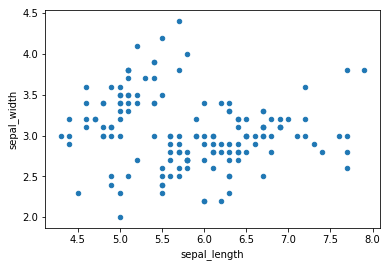

In [6]:
#2-D scatter plot 
#Always understand the axis:labels and scale
#plt.scatter(x=iris['sepal_length'],y=iris['sepal_width'])
iris.plot(kind='scatter',x='sepal_length',y='sepal_width')
plt.show()
#can not make much sence out of it.
#what if we color the points by their class-label /flower-type.

C:\Users\ASHU\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


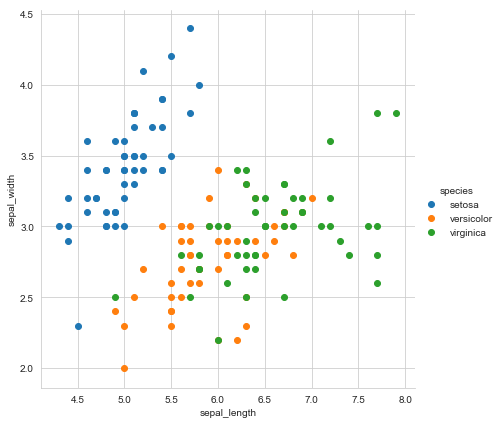

In [7]:
#2-D scatter plot with color-coding for each flower types/class.
#here sns crossponds to seaborn

sns.set_style('whitegrid')
sns.FacetGrid(iris,hue='species',size=6).map(plt.scatter,'sepal_length','sepal_width').add_legend()

plt.show()

observations: 
<br>1.using sepal_length and sepal_width features we can distinguish setosa flowers from others.</br>
<br>2. Seperating Versicolor from virginca is much harder as they have considerable overlap</br>


In [8]:
#we can not visualize all the combination of plot togather as we can understand only up to 3-D,  
#so we can visualize all the pair of visualization  by using Pair-Plot


# Pair-plot:-

C:\Users\ASHU\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


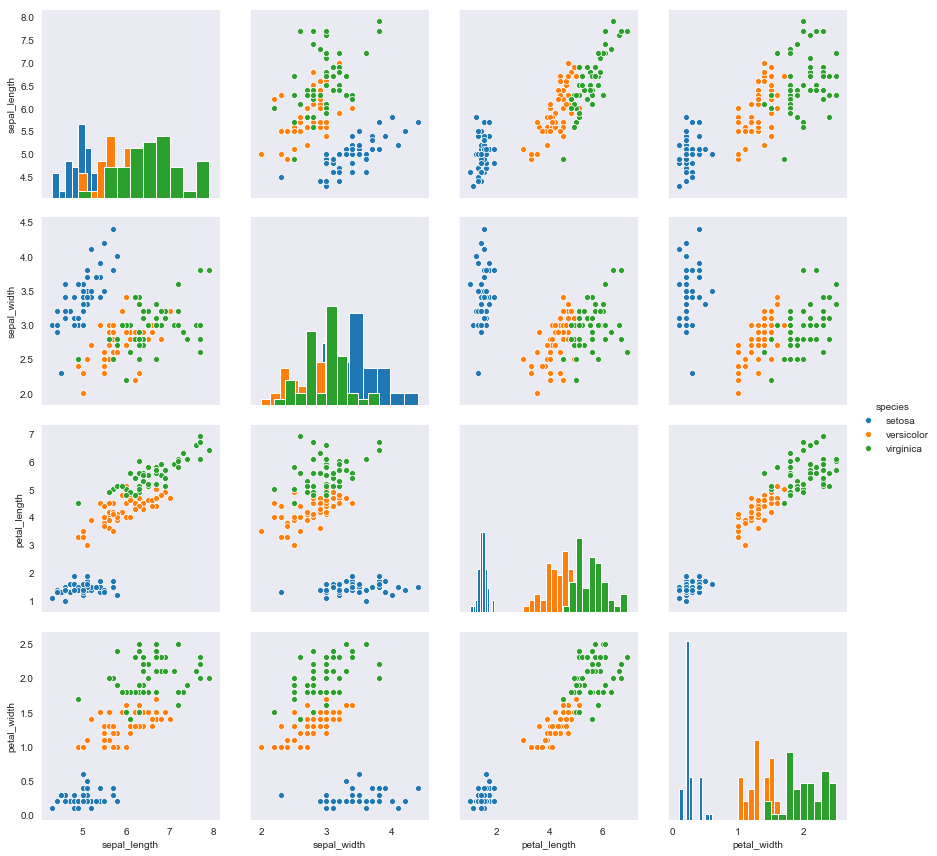

In [9]:
#pairwise scatter plot
#Dis-Advantage-can be used when number of features are high , but
#can not visualize higher dimensional pattern in 3-D and 4-D
#only possible to view 2D patterns.
sns.set_style('dark')
sns.pairplot(iris,hue='species',diag_kind='hist',size=3)
plt.show()

Observations:

<br>1. petal_length and petal_width are the most useful features to identify various flower types.</br>
<br>2.While Setosa can be easily identified (linearly seperable), Virnica and Versicolor have some
overlap (almost linearly seperable).</br>
<br>3.We can find "lines" and "if-else" conditions to build a simple model to classify the flower types.</br>

# Histogram, PDF, CDF

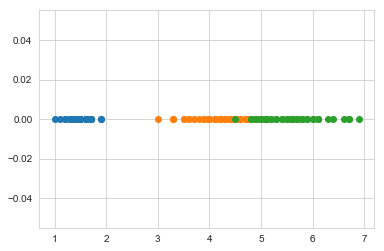

In [11]:
# What about 1-D scatter plot using just one feature?
#1-D scatter plot of petal-length
import numpy as np
sns.set_style('whitegrid')
iris_setosa = iris.loc[iris["species"] == "setosa"];
iris_virginica = iris.loc[iris["species"] == "virginica"];
iris_versicolor = iris.loc[iris["species"] == "versicolor"];
#print(iris_setosa["petal_length"])
plt.plot(iris_setosa["petal_length"], np.zeros_like(iris_setosa['petal_length']), 'o')
plt.plot(iris_versicolor["petal_length"], np.zeros_like(iris_versicolor['petal_length']), 'o')
plt.plot(iris_virginica["petal_length"], np.zeros_like(iris_virginica['petal_length']), 'o')

plt.show()
#Disadvantages of 1-D scatter plot: Very hard to make sense as points 
#are overlapping a lot.
#Are there better ways of visualizing 1-D scatter plots?

C:\Users\ASHU\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


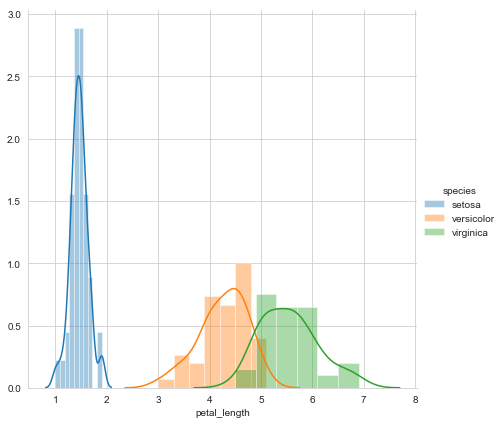

In [16]:
sns.FacetGrid(iris,hue='species', size=6).map(sns.distplot,'petal_length').add_legend()

<br>.So, on the basis of petal_length we can classify satosa very well from other but between versicolor and virginica 
there is an overlap , hence there are some miss match(i,e we are can not predict overlaping part)</br>
<br>here we can predict by simple python if else conditions like'if petal_length <2, species=setosa, elif (petal_length)<5:
species==versicolor, else:, species==virginica'.although there is some overlap but we never want a machine learning algorithm 
with 100% accuracy</br>

C:\Users\ASHU\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


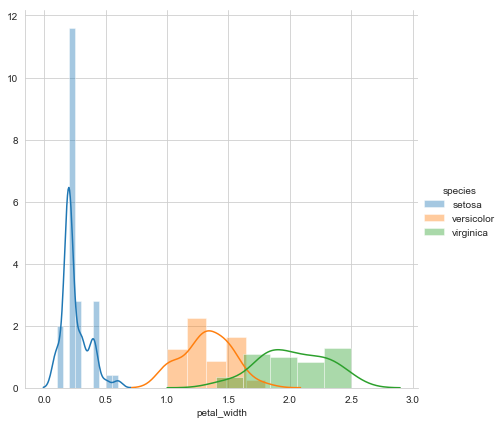

In [21]:
sns.FacetGrid(iris, hue='species', size=6).map(sns.distplot,'petal_width').add_legend()

C:\Users\ASHU\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


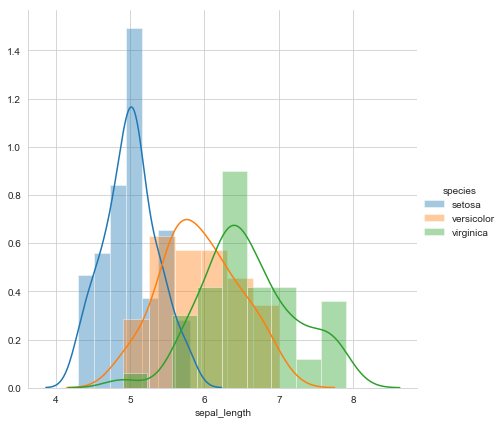

In [25]:
sns.FacetGrid(iris,hue='species', size=6).map(sns.distplot,'sepal_length').add_legend()

Here it is the worst visualization or classification as we can see we can not predict any thing due to lots of overlap in the features.

C:\Users\ASHU\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


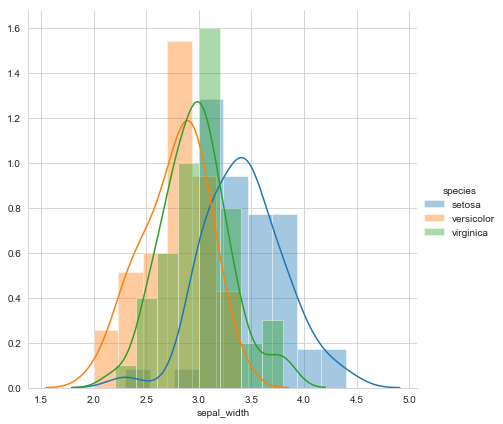

In [27]:
sns.FacetGrid(iris,hue='species',size=6).map(sns.distplot,'sepal_width').add_legend()

# Need for Cumulative Distribution Function (CDF)
<br>ans:We can visually see what percentage of versicolor flowers have a 
petal_length of less than 5?</br>

No handles with labels found to put in legend.


counts= [0.22222222 0.22222222 0.44444444 1.55555556 2.88888889 2.88888889
 1.55555556 0.88888889 0.         0.44444444]
bin_edges= [1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]


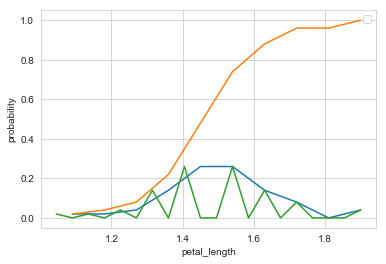

In [43]:
#Plot CDF of petal_length

counts , bin_edges= np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
print('counts=',counts)
print('bin_edges=',bin_edges)
pdf = counts/(sum(counts))
print(pdf)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf)
counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
plt.plot(bin_edges[1:],pdf)
plt.xlabel('petal_length')
plt.ylabel('probability')
plt.legend()

plt.show();

[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


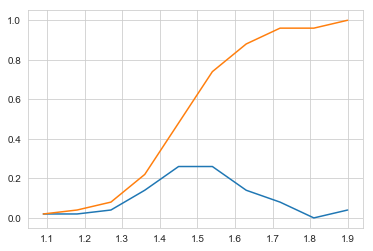

In [44]:
# Need for Cumulative Distribution Function (CDF)
# We can visually see what percentage of versicolor flowers have a 
# petal_length of less than 1.6?
# How to construct a CDF?
# How to read a CDF?

#Plot CDF of petal_length

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#compute CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)



plt.show();

[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.1  0.24 0.08 0.18 0.16 0.1  0.04 0.02 0.06]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


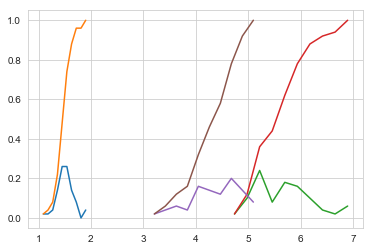

In [45]:
# Plots of CDF of petal_length for various types of flowers.

# Misclassification error if you use petal_length only.

counts, bin_edges = np.histogram(iris_setosa['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


# virginica
counts, bin_edges = np.histogram(iris_virginica['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


#versicolor
counts, bin_edges = np.histogram(iris_versicolor['petal_length'], bins=10, 
                                 density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.show();

# Mean, Variance and Std-dev:

In [46]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [47]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [118]:
iris_satossa=iris.loc[iris['species']=='setosa']
iris_virginicaa=iris.loc[iris['species']=='virginica']
iris_versicolorr=iris.loc[iris['species']=='versicolor']
#Mean, Variance, Std-deviation,  
print("Means:")
print(np.mean(iris_satossa['petal_length']))
#Mean with an outlier.
print(np.mean(np.append(iris_satossa['petal_length'],50)))
print(np.mean(iris_virginicaa["petal_length"]))

print(np.mean(iris_versicolorr["petal_length"]))


print('standard deviation')
print(np.std(iris_satossa["petal_length"]))
print(np.std(iris_virginicaa["petal_length"]))
print(np.std(iris_versicolorr["petal_length"]))






Means:
1.4620000000000002
2.4137254901960787
5.552
4.26
standard deviation
0.17191858538273286
0.5463478745268441
0.4651881339845204


# Median, Percentile, Quantile, IQR, MAD

In [124]:
#Median, Quantiles, Percentiles, IQR.
print("\nMedians:")
print(np.median(iris_satossa["petal_length"]))
#Median with an outlier
print(np.median(np.append(iris_satossa["petal_length"],50)));
print(np.median(iris_virginicaa["petal_length"]))
print(np.median(iris_versicolorr["petal_length"]))


print("\nQuantiles:")
print(np.percentile(iris_satossa["petal_length"],np.arange(0,100,25)))
print(np.percentile(iris_virginicaa["petal_length"],np.arange(0, 100, 25)))
print(np.percentile(iris_versicolorr["petal_length"], np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(iris_satossa["petal_length"],90))
print(np.percentile(iris_virginicaa["petal_length"],90))
print(np.percentile(iris_versicolorr["petal_length"], 90))

from statsmodels import robust
print ("\nMedian Absolute Deviation")
print(robust.mad(iris_satossa["petal_length"]))
print(robust.mad(iris_virginicaa["petal_length"]))
print(robust.mad(iris_versicolorr["petal_length"]))


Medians:
1.5
1.5
5.55
4.35

Quantiles:
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]

90th Percentiles:
1.7
6.3100000000000005
4.8

Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


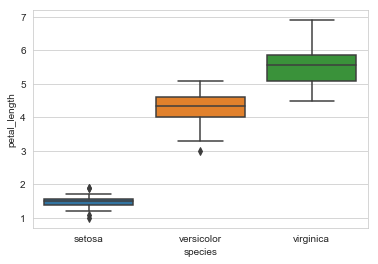

In [125]:
#Box-plot with whiskers: another method of visualizing the  1-D scatter plot more intuitivey.
# The Concept of median, percentile, quantile.
# How to draw the box in the box-plot?
# How to draw whiskers: [no standard way] Could use min and max or use other complex statistical techniques.
# IQR like idea.

#NOTE: IN the plot below, a technique call inter-quartile range is used in plotting the whiskers. 
#Whiskers in the plot below donot correposnd to the min and max values.

#Box-plot can be visualized as a PDF on the side-ways.

sns.boxplot(x='species',y='petal_length', data=iris)
plt.show()

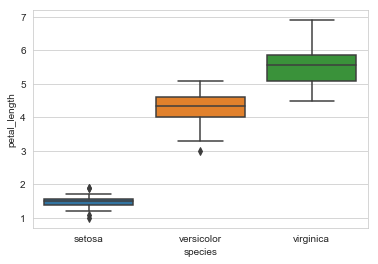

In [130]:
sns.boxplot(y='petal_length',x='species',data=iris)

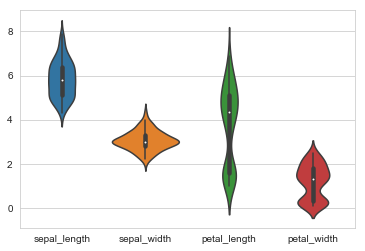

In [133]:
# A violin plot combines the benefits of the previous two plots 
#and simplifies them

# Denser regions of the data are fatter, and sparser ones thinner 
#in a violin plot
sns.violinplot(data=iris)

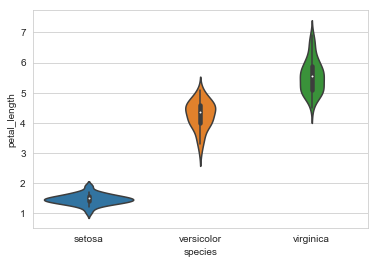

In [138]:
sns.violinplot(data=iris,x='species',y='petal_length')